Load data
-------------------------

In [13]:
from library.utils.load_data import Load
data = Load()

data("library/data/txt_data/case_5.txt")
data


Number of the categories goods is 10.        
Number of the bins is 30           
Matrix Q - 10x30 save information of the goods position and bins with 10 categories goods and 30 bins.        
Matrix d - 31x31 save distance between bins        
q size 10 is array save the orders with each category goods: [73 65 22 65  2 17 22 43 68 57]

In [14]:
import numpy as np
N = data.num_kinds
M = data.num_bins
Q = data.mat_info
d = data.mat_dis
q = data.order
X = np.full(M+1, -1)
cost = 0
min_cost = np.inf
solution = np.copy(X)

Branch and bound algorithm
----------------------------

In [15]:
history_cost = []
def Try(k):
    global Q, d, q, N, M, X, cost, min_cost, solution
    for v in range(1, M+1):
        if v not in X[:k]:
            # update the state
            X[k] = v
            cost += d[X[k-1], X[k]]
            q -= Q[:, v-1]

            if (cost + np.min(d) <= min_cost):
                if np.all(q <= 0) or k == M:
                    if cost + d[X[k],0] < min_cost:
                        min_cost = cost + d[X[k],0]
                        solution = np.copy(X[:k+1])
                        print(f"{solution} \n Cost: {min_cost} \n")
                        history_cost.append(min_cost)
                else:
                    Try(k+1)
            # recover the state
            cost -= d[X[k-1], X[k]]
            q += Q[:, v-1]


# Run
X[0] = 0
Try(1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 
 Cost: 8158 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 27 29] 
 Cost: 7935 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 29] 
 Cost: 7851 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 18] 
 Cost: 7673 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 28] 
 Cost: 7624 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 29] 
 Cost: 7571 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16] 
 Cost: 7315 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 19] 
 Cost: 7255 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 17] 
 Cost: 7233 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 28] 
 Cost: 7012 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 22 15] 
 Cost: 6664 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 29 27 17] 
 Cost: 6647 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 20 28] 
 Cost: 6645 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 21 18 17] 
 Cost: 6602 

[ 0  1  2  3  4  5  6  7  8  9 10 11

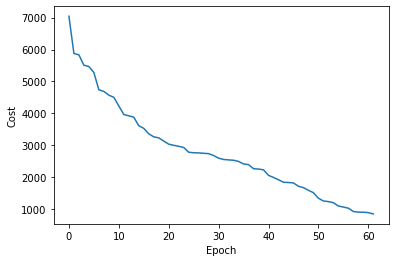

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cost)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()